In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

In [2]:
font_prop = {
    'family':'Times New Roman',
    'size':15,
    'weight':'medium'
}
matplotlib.rc('font', **font_prop)

## Linear Regression
- It simply makes predictions by computing weighted sum of input features and a constant term called a bias.
- $\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x3 + \cdots + \theta_n x_n$

**In vectorized form:**
- $\hat{y} = h_\theta(x) = \theta \cdot (x)$
Where
- $\theta$ is parameter vector containing bias term $\theta_0$ and other parameters $\theta_1$ to $\theta_n$
- $x$ is the instance’s feature vector, containing $x_0$ to $x_n$ with $x_0$ always equal to 1.
- $h_θ$ is the hypothesis function, using the model parameters θ.

**IMPORTANT!!!**
- In Machine Learning, vectors are often represented as column vectors, which are 2D arrays with a single column. 
- So, if $\theta$ and $x$ are column vectors, then the prediction is $\hat{y} = \theta^T\cdot x$

**Performance Measure: MSE - The cost function**
- The formula for *mean squared error(MSE)* of *Squared Sum of Residuals (SSR)* both are same is given by: $\text{MSE}(X, h_\theta) = 1/m \sum_{i=1}^{m} (\hat{y}_i - y_i)^2$ 

### The normal equation
- There is a closed form mathematical equation to directly compute the value of $\theta$ parameters which is given as: $\hat\theta = (X^T X)^{-1} X^T y$
where, $\hat\theta$ is the values of parameters that would minimize the cost function, and $y$ is the vector of target/label values containing data from $y^{(1)}$ to $y^{(m)}$

**Lets try out this normal equation by randomly creating a linear looking data**

In [206]:
X = 2 * np.random.rand(100,1)  #Random values in a given shape.
y = 4 +3 * X + np.random.randn(100,1)  #Return a sample (or samples) from the "standard normal" distribution.


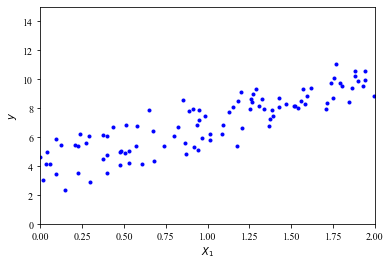

In [4]:
fig, ax = plt.subplots()
ax.plot(X, y, "b.")
ax.set_xlabel("$X_1$")
ax.set_ylabel("$y$")
plt.axis([0, 2, 0, 15]) #xmin, xmax, ymin, ymax
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)), X] #column stack
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.93254674],
       [3.01920705]])

In [6]:
#we have used function f(x) = 4 +3x + Some gaussian noise, and ended up with parameters with values close to 4 and 3
theta_best

array([[3.93254674],
       [3.01920705]])

In [7]:
#making predictions with the available theta:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [8]:
X_new, X_new_b

(array([[0],
        [2]]),
 array([[1., 0.],
        [1., 2.]]))

In [9]:
y_predict = X_new_b.dot(theta_best)
y_predict #prediction

array([[3.93254674],
       [9.97096084]])

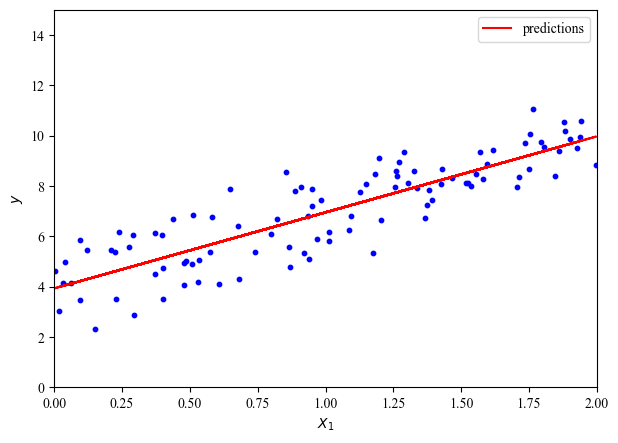

In [10]:
#lets plot all the predictions:
fig, ax = plt.subplots(figsize=(7,5), dpi=100)
ax.scatter(X, y, s=10, c='b')
ax.plot(X, X_b.dot(theta_best), 'r-', label="predictions")
ax.set_xlabel("$X_1$")
ax.set_ylabel("$y$")
plt.axis([0, 2, 0, 15]) #xmin, xmax, ymin, ymax
plt.legend()
plt.show()

In [11]:
#lets find same parameters with sklearn

from sklearn.linear_model import LinearRegression
lnrg = LinearRegression()
lnrg.fit(X, y)

LinearRegression()

In [12]:
lnrg.intercept_, lnrg.coef_ #the coefficients are same as above

(array([3.93254674]), array([[3.01920705]]))

In [13]:
#The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"),
#which you could call directly:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.93254674],
       [3.01920705]])

This function computes  𝐗+𝐲
 , where  𝐗+
  is the pseudoinverse of  𝐗
  (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[3.93254674],
       [3.01920705]])

### Computational Complexity
- Normal Method involves the computation of inverse of matrix $X^TX$, of size $(n+1) * (n+1)$ having time complexity of $O(n^2.4)$ to $O(n^3)$ based on algorithm implemented
- Both the Normal Equation and the SVD approach get very slow when the number of features grows large (e.g., 100,000).
- But, once we have trained with Normal method, the prediction is very fast. It depends linearly upon the feature size and the no. of instances to compute

## Gradient Descent
- It is the most widely used optimization approach in Machine Learning algorithms, which takes gradient of the cost function based on the parameters $\theta$ and goes in the direction of gradient descent, until the gradient is zero.
- We first start by assuming random values for the parameter $\theta$
- Then, we compute the differentiation (gradient) of the cost function(eg. SSR or MSE for linear regression) with respect to each parameters 
- Now, we update the parameter based on some relation by going in the direction of decrease of cost function
- The general expression for gradient descent is: $\theta_{i_{new}} = \theta_{i_{old}} - \alpha \cfrac{\partial J(\theta)}{\partial\theta}$

> where $J(\theta)$ is the cost function and $\alpha$ is the learning rate
 
- Learning rate is very important parameter in gradient descent algorithm, if the learning rate is very small, the rate of convergence will be very slow but it will ultimately converge, but for very large values of learning rate, we can't be sure to get the solution. The solution might diverge.
- One limitation with the gradient descent algorithm is that, it can ends up you to a completely different solutions for complex cost functions with various local minimas. We might never reach the global minimum.
- And for making things easy, the cost function for the linear regression is **MSE** which has only one global minimum and we can surely obtain the solution with gradient descent with proper learning rate
- We must ensure that all of the features have same scale by using `sklearn.StandardScalar` to ensure all features have similar scale so the rate of convergence will be fast.

## Batch Gradient Descent
- Gradient Vector of the cost function
 $$\nabla_\theta \text{MSE}(\theta) = \begin{pmatrix} \cfrac{\partial}{\partial \theta_0} \text{MSE}(\theta) \\ \cfrac{\partial}{\partial \theta_1} \text{MSE}(\theta)  \\ \vdots \\ \cfrac{\partial}{\partial \theta_n} \text{MSE}(\theta) \\ \end{pmatrix} = \cfrac{2}{m} X^T(X\theta - y)$$
 - Batch gradient descent used all the values of training sets (X) instances at each step of gradient descent, so is known as batch gradient descent.
 - It is terribly slow on very large data sets.
 - However good thing is, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.
 
 $$ \theta^\text{(next step)} = \theta - \eta \nabla_\theta \text{MSE}(\theta) $$
 
 **Implementation of Gradient Descent**

In [15]:
#just a working model
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta #lets see the value

array([[3.93254674],
       [3.01920705]])

wow we have reached the desired parameter values very quick

### Now lets alter learning rates and see how the learning goes on

C:\Users\paude\AppData\Local\Temp/ipykernel_10576/172618023.py:19: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rates[i+j+k] * gradients


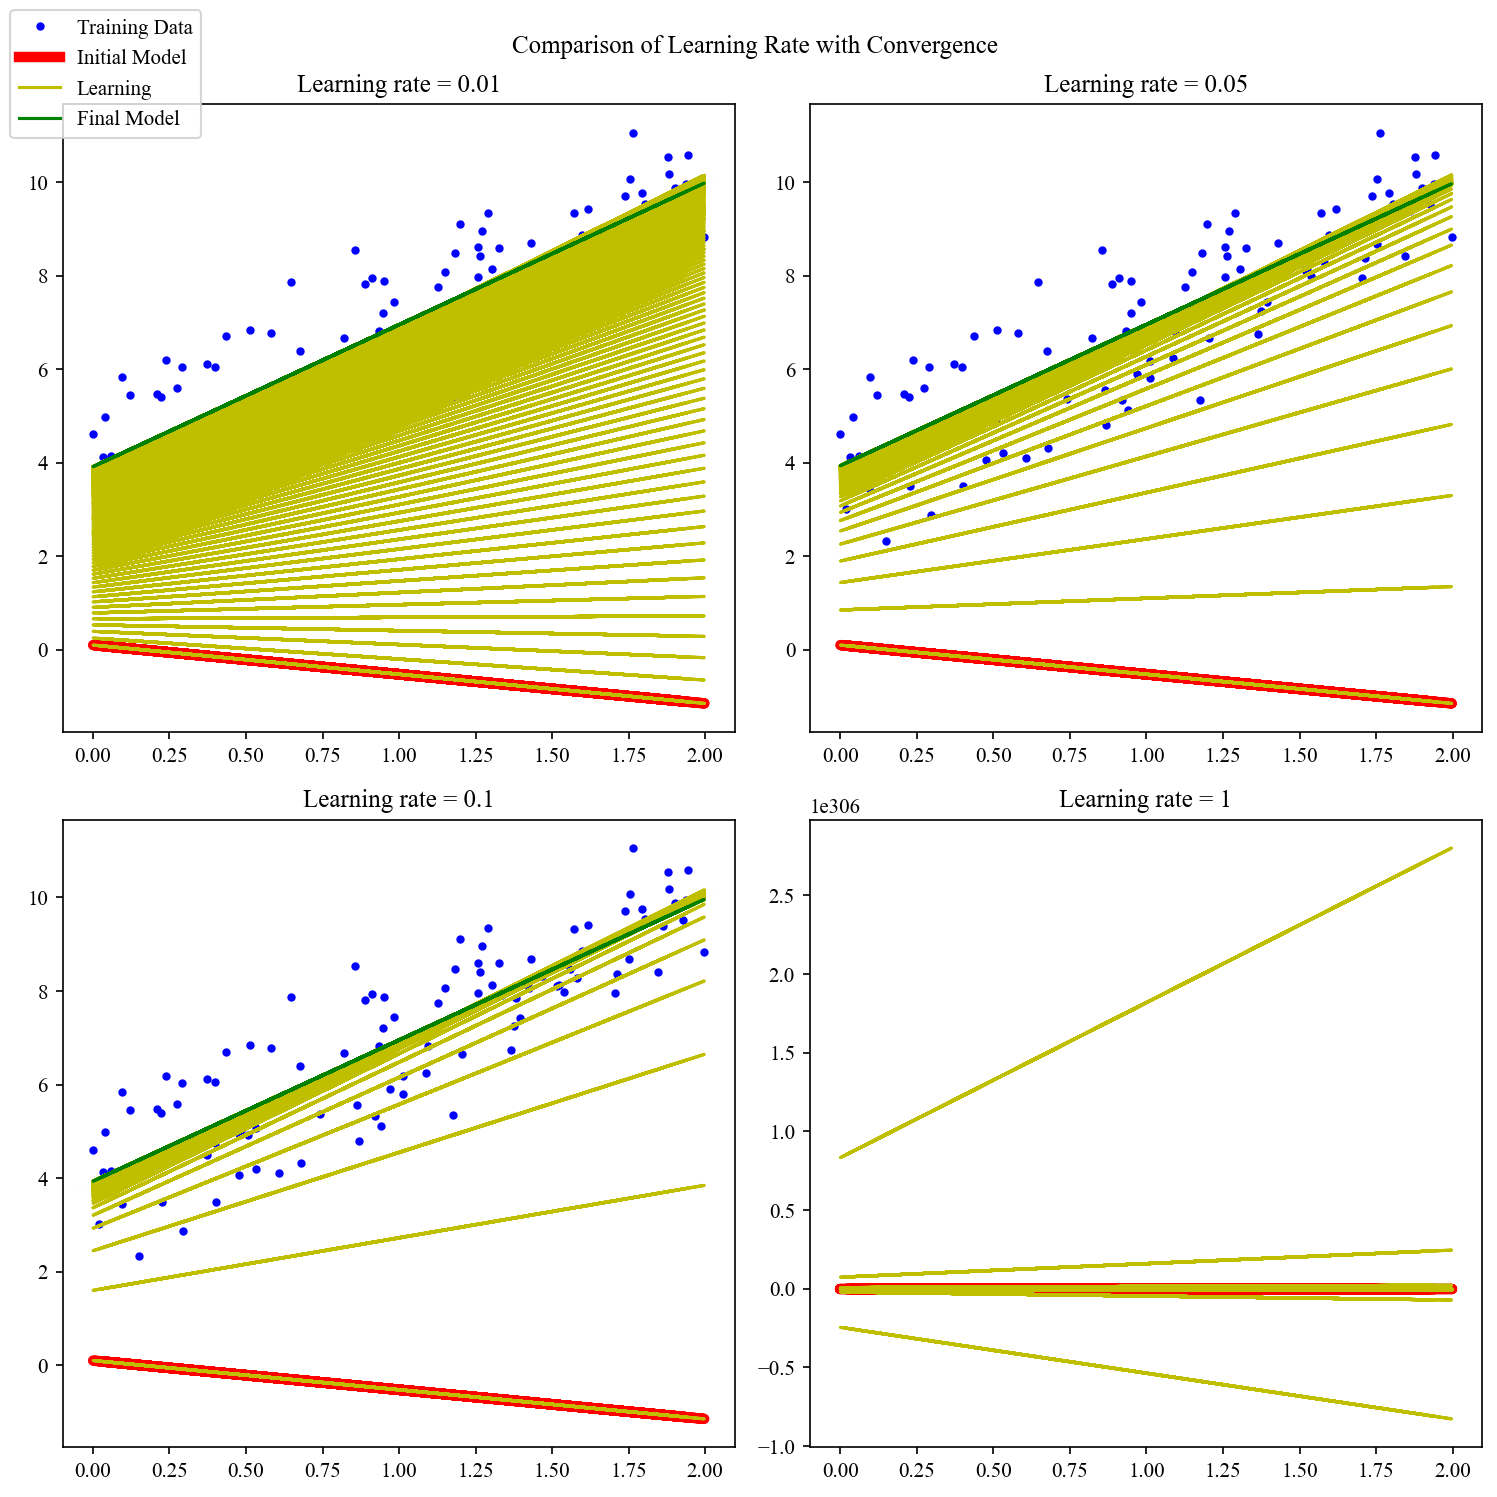

In [16]:
eta = .1 #learning rate
m = 100 #no of data sets
max_steps = 1000
learning_rates = [.01, .05, .1, 1]
initial_theta = np.random.randn(2,1) #to ensure same initial guess for all the different learning rates

fig, ax = plt.subplots(2,2 ,figsize=(10,10), tight_layout=True, dpi=150)

for i in range(2):
    k = i
    for j in range(2):
        theta = initial_theta
        ax[i][j].plot(X, y, 'b.', label="Training Data")
        ax[i][j].plot(X, theta[0]+theta[1]*X, 'r',lw=5, label="Initial Model")
        for step in range(max_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            #if (step<10):
            ax[i][j].plot(X, theta[0]+theta[1]*X, 'y', label="Learning")
            theta = theta - learning_rates[i+j+k] * gradients
        ax[i][j].plot(X, theta[0]+theta[1]*X, 'g', label="Final Model")
        ax[i][j].set_title(f"Learning rate = {learning_rates[i+j+k]}")
        
fig.suptitle("Comparison of Learning Rate with Convergence")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc="upper left")

plt.show()

Wow! this shows how important the learning rate is:
- fig(1) shows that very small learning rate (0.1) so that the rate of convergence is very slow
- fig(2) shows quite high learning rate(0.5) so the rate of convergence is fast
- fig(3) shows best learning rate among all, so rate of convergence is best of all
- but, fig(4) has very high learning rate, so the solution is bouncing off and is diverging

To find the optimum learning rate, we can use grid search. However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge

### lets visualize how initial data affects convergence rate

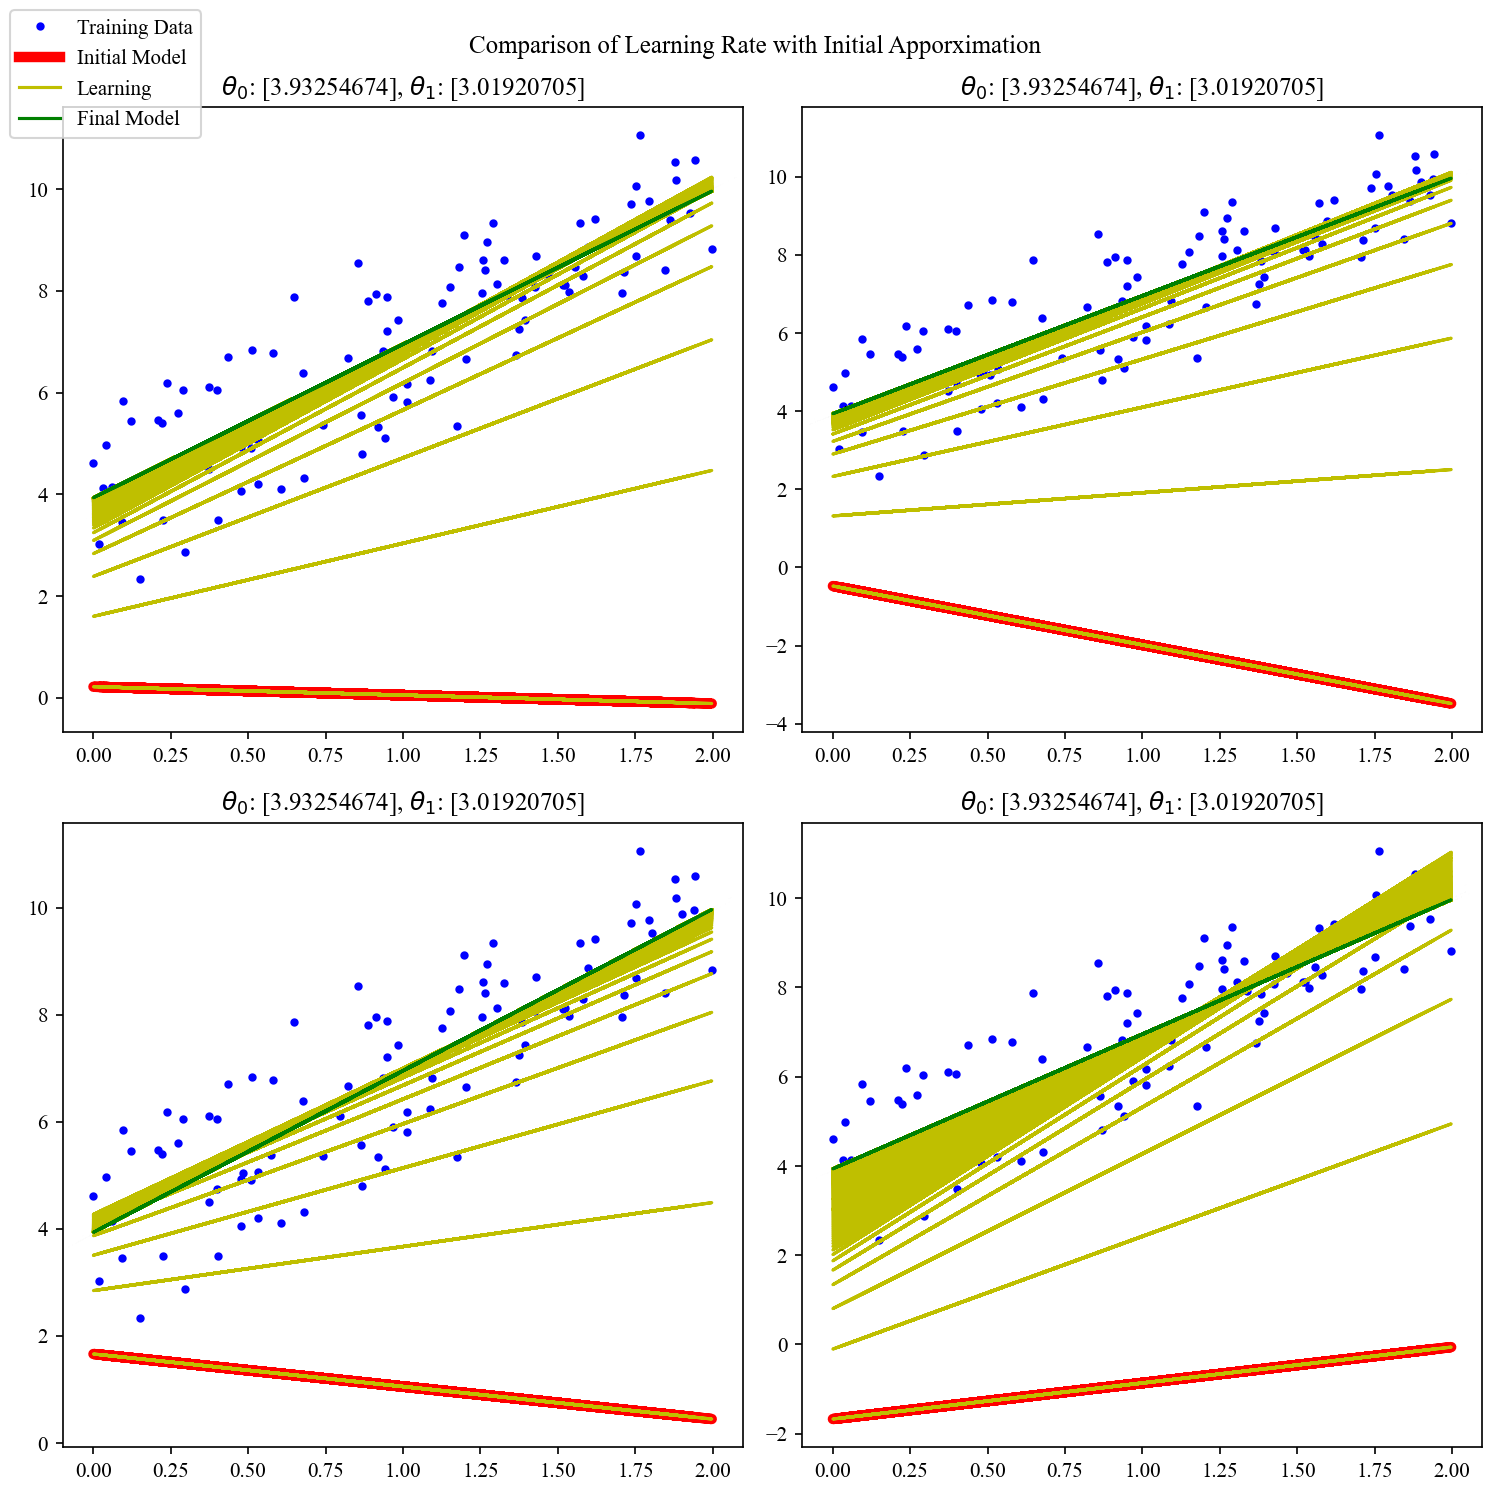

In [17]:
eta = .1 #learning rate
m = 100 #no of data sets
max_steps = 1000
learning_rate = 0.1 #best of 4
#initial_theta = np.random.randn(2,1) #to ensure same initial guess for all the different learning rates

fig, ax = plt.subplots(2,2 ,figsize=(10,10), tight_layout=True, dpi=150)

for i in range(2):
    k = i
    for j in range(2):
        theta = np.random.randn(2,1)
        ax[i][j].plot(X, y, 'b.', label="Training Data")
        ax[i][j].plot(X, theta[0]+theta[1]*X, 'r',lw=5, label="Initial Model")
        for step in range(max_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            #if (step<10):
            ax[i][j].plot(X, theta[0]+theta[1]*X, 'y', label="Learning")
            theta = theta - learning_rate * gradients
        ax[i][j].plot(X, theta[0]+theta[1]*X, 'g', label="Final Model")
        ax[i][j].set_title(rf"$\theta_0$: {theta[0]}, $\theta_1$: {theta[1]}")
        
fig.suptitle("Comparison of Learning Rate with Initial Apporximation")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc="upper left")

plt.show()

Not that type of adverse effects as by learning rate

## Stochastic Gradient Descent
**Why SGD?**
- The problem with Batch Gradient Descent is that it performs computation on whole training instances at each step of the gradient descent, so it is very inefficient when datasets are very very large

**Yeah !**
- SGD picks random instances at each every step and computes gradients based on those instances only.
- It greatly reduces the learning effort as very small memory is required at each step.
- *fact*: SGD can be implemented as **out-of-core-algorithm**

**But :(**
- But due to Stochastic(Random) nature of SGD, it is much less regular than batch gradient descent, and unline BGD, SGD have various bounces. And, the values are not actually optimal. 
- When the cost function is very irregular (as in Figure 4-6), this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

**Solution**
- Use of Graudally decreasing Learning Rate, so steps become small small and then finally sets out at global minima
- **FACT:** This process of gradually decreasing Learning Rate is inspired from Metallurgy: Annealing of Metals.

**Learning Schedule:** The function that determines Learning Rate at each step.

If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early

**Implementation of Stochiastic Gradient Descent**

In [18]:
n_epochs = 50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(epoch * m + i)
        theta = theta - learning_rate * gradients
theta
        
    

array([[3.94889936],
       [3.024533  ]])

each times we run the code, the theta is always different, and is not the optimal solution as we observed in previous theta values

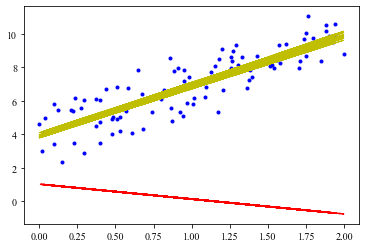

In [19]:
#lets plot the SGD
theta = np.random.randn(2,1)


fig,ax = plt.subplots()
ax.plot(X, y , 'b.')
ax.plot(X, theta[0]+theta[1]*X, 'r--')
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(epoch * m + i)
        theta = theta - learning_rate * gradients
    if epoch < 10:
        ax.plot(X, theta[0]+theta[1]*X, 'y', lw=1)
        

In [20]:
#linear regression with SGD in scikit learn
from sklearn.linear_model import SGDRegressor
sgdreg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)  
#runs for maximum 1000 epochs or until loss drops by 1e-3 during each epochs
sgdreg.fit(X, y.ravel())


SGDRegressor(eta0=0.1, penalty=None)

In [21]:
sgdreg.intercept_, sgdreg.coef_

(array([3.87474279]), array([2.96866298]))

## Minit Batch Gradient Descent 
- Combination of both BGD and SGD
- Insted of computing gradients on full instances or just on some random instances at each step, mini batch gradient descent picks random set of instances called mini batches.
- The main **advantage** of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.
- **But,** it might be harder for Mini-Batch GD to escape the local minima.
- It also dont stops like batch gradients, but bounces like in SGD

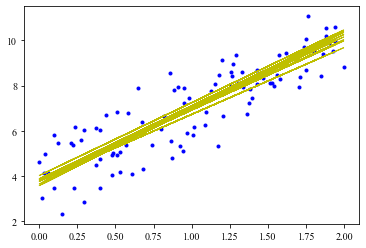

In [28]:
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0

fig,ax = plt.subplots()
ax.plot(X, y , 'b.')
#ax.plot(X, theta[0]+theta[1]*X, 'r--')

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
    if epoch < 10:
        ax.plot(X, theta[0]+theta[1]*X, 'y', lw=1)
    

In [23]:
theta

array([[3.96369205],
       [3.02619694]])

### Comparison of various algorithms for training linear regression models

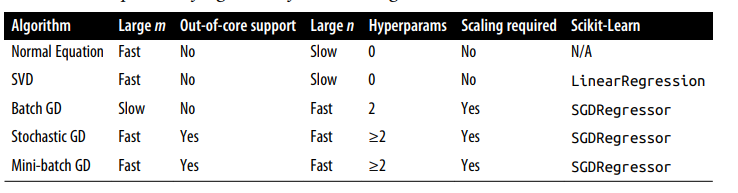

## Polynomial Regression
- If our data is more complex than a straight line.
- We do it by adding powers to existing features as new features and perform linear regression

In [284]:
m = 100
X = 7 * np.random.rand(m,1) - 4
y = .5 * X**2 + X + 2 + np.random.randn(m,1) #adding some gaussian noise

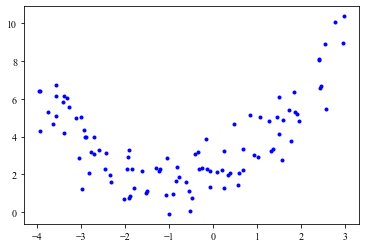

In [285]:
fig, ax = plt.subplots()
ax.plot(X, y, 'b.')
plt.show()

We know that we can never fit a straight line through this data, so we use `sklearn.preprocessing.PolynomialFeatures`. This will add power terms to each of the feature and transform our data

In [286]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X)


In [287]:
X[:10], X_poly[:10], X[:10]**2 #what above code did is just created array with X and squared values of X to X_poly

(array([[-0.61473695],
        [-2.89518492],
        [ 1.350268  ],
        [-0.55127969],
        [-1.62704221],
        [-2.97163764],
        [-0.13487421],
        [ 1.26971918],
        [-2.02600453],
        [-2.46843954]]),
 array([[-0.61473695,  0.37790152],
        [-2.89518492,  8.3820957 ],
        [ 1.350268  ,  1.82322368],
        [-0.55127969,  0.30390929],
        [-1.62704221,  2.64726635],
        [-2.97163764,  8.83063024],
        [-0.13487421,  0.01819105],
        [ 1.26971918,  1.6121868 ],
        [-2.02600453,  4.10469436],
        [-2.46843954,  6.09319376]]),
 array([[0.37790152],
        [8.3820957 ],
        [1.82322368],
        [0.30390929],
        [2.64726635],
        [8.83063024],
        [0.01819105],
        [1.6121868 ],
        [4.10469436],
        [6.09319376]]))

In [288]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [289]:
lin_reg.intercept_, lin_reg.coef_

(array([2.01632382]), array([[0.94901779, 0.51938886]]))

Our original equation was: $.5 X^2 + X + 2 + (\text{Some Gaussian Noise})$. 

It gave equation as: $.4889 X^2 + .894 X + 2.0641$ which is pretty good though.

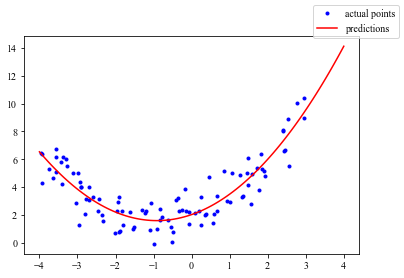

In [290]:
X_new = np.linspace(-4,4,100).reshape(100,1)
X_new_poly = poly_feat.fit_transform(X_new)
y_new_pred = lin_reg.predict(X_new_poly)

fig, ax = plt.subplots()
ax.plot(X, y, 'b.', label="actual points")
ax.plot(X_new, y_new_pred, 'r',label="predictions")
fig.legend()
plt.show()

#### Important Conclusions:
- Polynomial regression is also able to derive relationship between the multiple features which linear regression was not able to do.
- For example with features `a` and `b`, linear regression will be able to establish only linear features but, polynomial regression with **degree = 3** will include relations between the features like: $ab, a^2b, ab^2, a^3, b^3, a^2, b^2, ab$
- `PolynomialFeatures(degree=d)` transforms an array containing `n` features into an array containing `(n + d)! / d!n!` features, where `n!` is the factorial of `n`, equal to `1 × 2 × 3 × ⋯ × n`. Beware of the combinatorial explosion of the number of features!


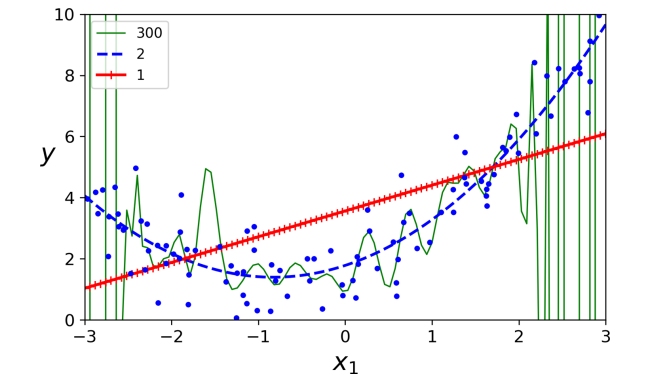




- 300 degree polynomial is highly overfitting the training data
- quadratic polynomial is best fit
- linear model is under fitting the data

**So, how to determine which type of regression to use for our data? How to determine if our model is overfitting or underfitting the training data?**
 - **Cross Validation**: It can give some idea about the model complexity. If the model performs well on training data, but generalizes poorly based on cross validation metrics, then the model might be overfitting, if performs poorly on both, it might be underfitting.
 - **Learning Curves**: They are plot of model performance on training set and validation set as a function of training set size.

**Lets Draw Learning Curve by varying training set size**

In [291]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(X, y, Model):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=10)
    train_errs, val_errs = [],[]

    for m in range(1, len(X_train)+1):
        Model.fit(X_train[:m], y_train[:m])
        y_prd_train = lr.predict(X_train[:m])
        y_prd_val = lr.predict(X_val)
        train_errs.append(mean_squared_error(y_train[:m], y_prd_train))
        val_errs.append(mean_squared_error(y_val, y_prd_val))
    
    plt.plot(np.sqrt(train_errs), "g--", label="training error")
    plt.plot(np.sqrt(val_errs),'r-', label="validation error")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)  


In [312]:
m = 100
X = 7 * np.random.rand(m,1) - 4
y = .5 * X**2 + X + 2 + np.random.randn(m,1) #adding some gaussian noise

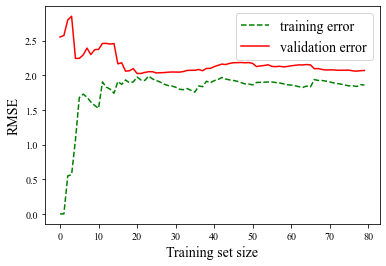

In [313]:
lr = LinearRegression()
plot_learning_curve(X, y, lr)
#plt.axis([0, 80, 0, 3.5])

Now lets plot the same curve for quadratic model

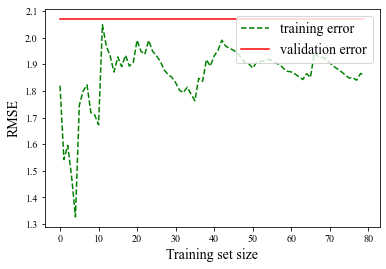

In [314]:
from sklearn.pipeline import Pipeline

polynomial_model = Pipeline([
    ("pol_feat", PolynomialFeatures(degree=3, include_bias=False)),
    ("linear_reg", LinearRegression())
    ])

plot_learning_curve(X, y, polynomial_model)

**What causes model's generalization error?**
Sum of the following errors makes up the generalization error:
- **Bias**: Wrong assumptions. Eg. assuming model is linear when it is actaully quadratic. *underfitting*
- **Variance**: Over fitting. Model's excessive sensitivity to small variation in data too. High degree polymonial model have chance of *overfitting* the model.
- **Irreducible Error**: Needs data preprocessing, cleaning. Eg- detecting outliers and treating them.